# Research Notebook
## Debbie Zhou
## Date: 17/03/2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

- Generated numerical dark matter cross-section values to compare with analytical results.

## Motivation:

The project's overall goal is to find the cross-section to simulate cold dark matter halo behavior in 2D. For this part of the project, my lab partner coded the 2D numerical solution while I coded the analytical solution according to the paper. 

This is so we can compare the analytical solution with the numerical to confirm accuracy. 

<span style="color: red;"> Very good </span>

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

I used the following equation from the paper "Self-Scattering for Dark Matter with an Excited State" [1]: 

**Equation 1:** Ground-to-ground elastic scattering cross-section

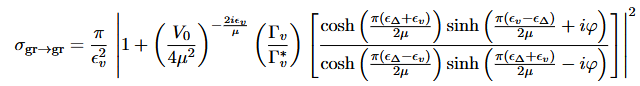

to calculate cross-sections of dark matter analytically. I performed these calculations for a Delta = 1 set and a Delta = 0 set. These values will be given to my lab partner to be used as comparison values to his numerical calculation results. 



Here is the code for calculating the Delta = 1 values:
```
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import fsolve

# Constants
alpha = 1e-1
delta = 1

m_phi1 = 1e-2 * 1e6 
m_phi2 = 3 * 1e-2 * 1e6
m_phi3 = 6 * 1e-2 * 1e6

m_chi1 = 1e1 * 1e6
m_chi2 = 3 * 1e1 * 1e6
m_chi3 = 6 * 1e1 * 1e6

# Define v0, mu and phi
 
def compute_v0(b, r_M):
    return np.exp( (b * r_M) * (-0.5 + 0.5 * np.sqrt(1 + (4 / (b * r_M))))) / r_M

def mu(b, r_M):
    return b * (0.5 + 0.5 * np.sqrt(1 + (4 / (b * r_M))))

def phi (b):
    return np.sqrt(2 * np.pi / b)

## Dimensionless Parameters

def epsilon_v (v, alpha): # a
    e_v = v / (alpha)

    return e_v

def epsilon_phi (m_phi, m_chi, alpha): # 1/b
    e_p = m_phi/(m_chi * alpha)

    return e_p

def epsilon_delta (delta, m_chi, alpha): # d
    e_d = np.sqrt((2 * delta) / (m_chi * ((alpha) ** 2) ))

    return e_d

def epsilon_Delta (epsilon_delta, epsilon_v):
    e_D = np.sqrt((epsilon_v**2) - (epsilon_delta**2))

    return e_D

# Cross section Functions

def Gamma_v (epsilon_v, mu, epsilon_Delta):
    term1 = gamma(1 + (1j*epsilon_v/mu))
    term2 = gamma( ((1j*epsilon_v - 1j*epsilon_Delta)/ (2*mu)) + (1/2))
    term3 = gamma( ((1j*epsilon_v + 1j*epsilon_Delta)/ (2*mu)) + (1/2))

    return term1*term2*term3

def sigma_gr_gr(V0, mu, epsilon_v, Gamma_v, Gamma_star_v, epsilon_Delta, phi): # Eqn 3.1
    term1 = np.cosh(np.pi * (epsilon_Delta + epsilon_v) / (2 * mu))
    term2 = np.sinh(np.pi * (epsilon_v - epsilon_Delta) / (2 * mu) + 1j * phi)
    term3 = np.cosh(np.pi * (epsilon_Delta - epsilon_v) / (2 * mu))
    term4 = np.sinh(np.pi * (epsilon_Delta + epsilon_v) / (2 * mu) - 1j * phi)
    
    result = 1 + (V0 / (4 * mu**2))**(- (2 * (1j * epsilon_v) / mu)) * (Gamma_v / Gamma_star_v) * (term1 * term2 / (term3 * term4))
    
    return (np.pi / (epsilon_v **2)) * np.abs(result)**2  

# Functions for calculating r_M

def calculate_matching_radius(b, d):
    def equation(r, b, d):
        epsilon = np.maximum(d**2 / 2, b**2)
        return r * np.exp(r * b) - epsilon / b 

    initial_guess = 1 / b  
    radius, = fsolve(equation, initial_guess, args=(b, d))
    return radius

# Lists to hold calculations

m_chi = []
m_phi = []
alpha_list = []
delta_list = []
a_list = []
epsilon_delta_list = []

cross_section_list = []

# Generate v values
v = np.linspace(1e-3, 1e-2, 5) # a > b

# Calculate a
a = epsilon_v(v, alpha)

# m_phi1 and m_chi1

b1 = epsilon_phi (m_phi1, m_chi1, alpha)
d1 = epsilon_delta (delta, m_chi1, alpha)
r_M1 = calculate_matching_radius(b1, d1)
v01= compute_v0(b1, r_M1)
mu1 = mu(b1, r_M1)
phi1 = phi(b1)

i = 0

while i < len(a):
    eD = epsilon_Delta (d1, a[i])
    Gv = Gamma_v (a[i], mu1, eD)
    Gsv = np.conj(Gv)
    cross_section = sigma_gr_gr(v01, mu1, a[i], Gv, Gsv, eD, phi1)

    m_chi.append(m_chi1)
    m_phi.append(m_phi1)
    alpha_list.append(alpha)
    delta_list.append(delta)
    a_list.append(a[i])
    epsilon_delta_list.append(d1)
    cross_section_list.append(cross_section)

    i += 1

# m_phi2 and m_chi2

b2 = epsilon_phi(m_phi2, m_chi2, alpha)
d2 = epsilon_delta (delta, m_chi2, alpha)
r_M2 = calculate_matching_radius(b2, d2)
v02 = compute_v0(b2, r_M2)
mu2 = mu(b2, r_M2)
phi2 = phi(b2)

i = 0

while i < len(a):
    eD = epsilon_Delta (d2, a[i])
    Gv = Gamma_v (a[i], mu2, eD)
    Gsv = np.conj(Gv)
    cross_section = sigma_gr_gr(v02, mu2, a[i], Gv, Gsv, eD, phi2)

    m_chi.append(m_chi1)
    m_phi.append(m_phi1)
    alpha_list.append(alpha)
    delta_list.append(delta)
    a_list.append(a[i])
    epsilon_delta_list.append(d2)
    cross_section_list.append(cross_section)

    i += 1

# m_phi3 and m_chi3
b3 = epsilon_phi(m_phi3, m_chi3, alpha)
d3 = epsilon_delta(delta, m_chi3, alpha)
r_M3 = calculate_matching_radius(b3, d3)
v03 = compute_v0(b3, r_M3)
mu3 = mu(b3, r_M3)
phi3 = phi(b3)

i = 0
while i < len(a):
    eD = epsilon_Delta(d3, a[i])
    Gv = Gamma_v(a[i], mu3, eD)
    Gsv = np.conj(Gv)
    cross_section = sigma_gr_gr(v03, mu3, a[i], Gv, Gsv, eD, phi3)
    
    m_chi.append(m_chi3)
    m_phi.append(m_phi3)
    alpha_list.append(alpha)
    delta_list.append(delta)
    a_list.append(a[i])
    epsilon_delta_list.append(d3)
    cross_section_list.append(cross_section)
    
    i += 1

# m_phi1 and m_chi2
b4 = epsilon_phi(m_phi1, m_chi2, alpha)
d4 = epsilon_delta(delta, m_chi2, alpha)
r_M4 = calculate_matching_radius(b4, d4)
v04 = compute_v0(b4, r_M4)
mu4 = mu(b4, r_M4)
phi4 = phi(b4)

i = 0
while i < len(a):
    eD = epsilon_Delta(d4, a[i])
    Gv = Gamma_v(a[i], mu4, eD)
    Gsv = np.conj(Gv)
    cross_section = sigma_gr_gr(v04, mu4, a[i], Gv, Gsv, eD, phi4)
    
    m_chi.append(m_chi2)
    m_phi.append(m_phi1)
    alpha_list.append(alpha)
    delta_list.append(delta)
    a_list.append(a[i])
    epsilon_delta_list.append(d4)
    cross_section_list.append(cross_section)
    
    i += 1

# m_phi2 and m_chi3
b5 = epsilon_phi(m_phi2, m_chi3, alpha)
d5 = epsilon_delta(delta, m_chi3, alpha)
r_M5 = calculate_matching_radius(b5, d5)
v05 = compute_v0(b5, r_M5)
mu5 = mu(b5, r_M5)
phi5 = phi(b5)

i = 0
while i < len(a):
    eD = epsilon_Delta(d5, a[i])
    Gv = Gamma_v(a[i], mu5, eD)
    Gsv = np.conj(Gv)
    cross_section = sigma_gr_gr(v05, mu5, a[i], Gv, Gsv, eD, phi5)
    
    m_chi.append(m_chi3)
    m_phi.append(m_phi2)
    alpha_list.append(alpha)
    delta_list.append(delta)
    a_list.append(a[i])
    epsilon_delta_list.append(d5)
    cross_section_list.append(cross_section)
    
    i += 1

# Stack the data into a 2D array
data = np.column_stack((m_chi, m_phi, alpha_list, delta_list, a_list, epsilon_delta_list, cross_section_list))

# Save to a text file
np.savetxt("cross section calculations.txt", data, header=" m_chi | m_phi | alpha | delta | a | epsilon_delta | cross-section ", comments='', fmt="%.8e")
```

Here is the resulting data table (**Table 1**): 
```
 m_chi | m_phi | alpha | delta | a | epsilon_delta | cross-section 
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-02 4.47213595e-03 3.30570645e+03
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 3.25000000e-02 4.47213595e-03 1.21328696e+03
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 5.50000000e-02 4.47213595e-03 5.40027277e+02
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 7.75000000e-02 4.47213595e-03 3.02784964e+02
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-01 4.47213595e-03 1.96854300e+02
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-02 2.58198890e-03 3.26640928e+03
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 3.25000000e-02 2.58198890e-03 1.20875109e+03
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 5.50000000e-02 2.58198890e-03 5.39353728e+02
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 7.75000000e-02 2.58198890e-03 3.02662563e+02
1.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-01 2.58198890e-03 1.96841990e+02
6.00000000e+07 6.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-02 1.82574186e-03 3.25697983e+03
6.00000000e+07 6.00000000e+04 1.00000000e-01 1.00000000e+00 3.25000000e-02 1.82574186e-03 1.20762606e+03
6.00000000e+07 6.00000000e+04 1.00000000e-01 1.00000000e+00 5.50000000e-02 1.82574186e-03 5.39185921e+02
6.00000000e+07 6.00000000e+04 1.00000000e-01 1.00000000e+00 7.75000000e-02 1.82574186e-03 3.02632029e+02
6.00000000e+07 6.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-01 1.82574186e-03 1.96838922e+02
3.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-02 2.58198890e-03 2.40912958e+02
3.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 3.25000000e-02 2.58198890e-03 2.39654255e+02
3.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 5.50000000e-02 2.58198890e-03 2.36844030e+02
3.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 7.75000000e-02 2.58198890e-03 2.32144295e+02
3.00000000e+07 1.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-01 2.58198890e-03 2.25264374e+02
6.00000000e+07 3.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-02 1.82574186e-03 7.43483286e+02
6.00000000e+07 3.00000000e+04 1.00000000e-01 1.00000000e+00 3.25000000e-02 1.82574186e-03 7.25596312e+02
6.00000000e+07 3.00000000e+04 1.00000000e-01 1.00000000e+00 5.50000000e-02 1.82574186e-03 6.90331254e+02
6.00000000e+07 3.00000000e+04 1.00000000e-01 1.00000000e+00 7.75000000e-02 1.82574186e-03 6.40647225e+02
6.00000000e+07 3.00000000e+04 1.00000000e-01 1.00000000e+00 1.00000000e-01 1.82574186e-03 5.80386239e+02
```



Here is the code for calculating the Delta = 0 values:
```
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import fsolve

# Constants
alpha = 1e-1
delta = 0
d = 0 # since delta = 0

# m_phi / m_chi from (0.001, 0.01, 0.1, 1)
ratio1 = 0.001
ratio2 = 0.01
ratio3 = 0.1
ratio4 = 1

# m_phi / m_chi from (10, 100, 1000, 1e4)
ratio5 = 10
ratio6 = 100
ratio7= 1000
ratio8 = 1e4

# Define v0, mu and phi
 
def compute_v0(b, r_M):
    return np.exp( (b * r_M) * (-0.5 + 0.5 * np.sqrt(1 + (4 / (b * r_M))))) / r_M

def mu(b, r_M):
    return b * (0.5 + 0.5 * np.sqrt(1 + (4 / (b * r_M))))

def phi (b):
    return np.sqrt(2 * np.pi / b)

# Dimensionless Parameters

def epsilon_v (v, alpha): # a
    e_v = v / (alpha)

    return e_v

def epsilon_phi (ratio, alpha): # 1/b
    e_p = ratio * alpha

    return e_p

def epsilon_Delta (epsilon_delta, epsilon_v):
    e_D = np.sqrt((epsilon_v**2) - (epsilon_delta**2))

    return e_D

# Cross section Functions

def Gamma_v (epsilon_v, mu, epsilon_Delta):
    term1 = gamma(1 + (1j*epsilon_v/mu))
    term2 = gamma( ((1j*epsilon_v - 1j*epsilon_Delta)/ (2*mu)) + (1/2))
    term3 = gamma( ((1j*epsilon_v + 1j*epsilon_Delta)/ (2*mu)) + (1/2))

    return term1*term2*term3

def sigma_gr_gr(V0, mu, epsilon_v, Gamma_v, Gamma_star_v, epsilon_Delta, phi): # Eqn 3.1
    term1 = np.cosh(np.pi * (epsilon_Delta + epsilon_v) / (2 * mu))
    term2 = np.sinh(np.pi * (epsilon_v - epsilon_Delta) / (2 * mu) + 1j * phi)
    term3 = np.cosh(np.pi * (epsilon_Delta - epsilon_v) / (2 * mu))
    term4 = np.sinh(np.pi * (epsilon_Delta + epsilon_v) / (2 * mu) - 1j * phi)
    
    result = 1 + (V0 / (4 * mu**2))**(- (2 * (1j * epsilon_v) / mu)) * (Gamma_v / Gamma_star_v) * (term1 * term2 / (term3 * term4))
    
    return (np.pi / (epsilon_v **2)) * np.abs(result)**2  

# Functions for calculating r_M

def calculate_matching_radius(b, d):
    def equation(r, b, d):
        epsilon = np.maximum(d**2 / 2, b**2)
        return r * np.exp(r * b) - epsilon / b 

    initial_guess = 1 / b  
    radius, = fsolve(equation, initial_guess, args=(b, d))
    return radius

# Lists to hold calculations

m_chi_m_phi = []
alpha_list = []
delta_list = []
a_list = []
epsilon_delta_list = []

cross_section_list = []

# Generate v values
v = [1e-7, 1e-6, 1e-5, 1e-4] # a > b

# Calculate a
a = epsilon_v(v, alpha)

# Ratios 1 to 8

ratios = [ratio1, ratio2, ratio3, ratio4, ratio5, ratio6, ratio7, ratio8]

for ratio in ratios:
    b = epsilon_phi(ratio, alpha)
    r_M = calculate_matching_radius(b, d)
    v0 = compute_v0(b, r_M)
    mu_val = mu(b, r_M)
    phi_val = phi(b)
    
    i = 0
    while i < len(a):
        eD = epsilon_Delta(d, a[i])
        Gv = Gamma_v(a[i], mu_val, eD)
        Gsv = np.conj(Gv)
        cross_section = sigma_gr_gr(v0, mu_val, a[i], Gv, Gsv, eD, phi_val)
        
        m_chi_m_phi.append(ratio)
        alpha_list.append(alpha)
        delta_list.append(delta)
        a_list.append(a[i])
        epsilon_delta_list.append(d)
        cross_section_list.append(cross_section)
        
        i += 1

# Stack the data into a 2D array

data = np.column_stack((m_chi_m_phi, alpha_list, delta_list, a_list, epsilon_delta_list, cross_section_list))

# Save to a text file
np.savetxt("delta = 0 cross-sections calculations.txt", data, header=" m_chi/m_phi ratio | alpha | delta | a | epsilon_delta | cross-section ", comments='', fmt="%.8e")
```

Here is the resulting data table (**Table 2**):
```
 m_chi/m_phi ratio | alpha | delta | a | epsilon_delta | cross-section 
1.00000000e-03 1.00000000e-01 0.00000000e+00 1.00000000e-06 0.00000000e+00 8.78143293e+02
1.00000000e-03 1.00000000e-01 0.00000000e+00 1.00000000e-05 0.00000000e+00 8.78143290e+02
1.00000000e-03 1.00000000e-01 0.00000000e+00 1.00000000e-04 0.00000000e+00 8.78143049e+02
1.00000000e-03 1.00000000e-01 0.00000000e+00 1.00000000e-03 0.00000000e+00 8.78118952e+02
1.00000000e-02 1.00000000e-01 0.00000000e+00 1.00000000e-06 0.00000000e+00 1.21281818e+03
1.00000000e-02 1.00000000e-01 0.00000000e+00 1.00000000e-05 0.00000000e+00 1.21281818e+03
1.00000000e-02 1.00000000e-01 0.00000000e+00 1.00000000e-04 0.00000000e+00 1.21281768e+03
1.00000000e-02 1.00000000e-01 0.00000000e+00 1.00000000e-03 0.00000000e+00 1.21276769e+03
1.00000000e-01 1.00000000e-01 0.00000000e+00 1.00000000e-06 0.00000000e+00 3.95987347e+03
1.00000000e-01 1.00000000e-01 0.00000000e+00 1.00000000e-05 0.00000000e+00 3.95987261e+03
1.00000000e-01 1.00000000e-01 0.00000000e+00 1.00000000e-04 0.00000000e+00 3.95978651e+03
1.00000000e-01 1.00000000e-01 0.00000000e+00 1.00000000e-03 0.00000000e+00 3.95119547e+03
1.00000000e+00 1.00000000e-01 0.00000000e+00 1.00000000e-06 0.00000000e+00 1.25502511e+02
1.00000000e+00 1.00000000e-01 0.00000000e+00 1.00000000e-05 0.00000000e+00 1.25502511e+02
1.00000000e+00 1.00000000e-01 0.00000000e+00 1.00000000e-04 0.00000000e+00 1.25502505e+02
1.00000000e+00 1.00000000e-01 0.00000000e+00 1.00000000e-03 0.00000000e+00 1.25501899e+02
1.00000000e+01 1.00000000e-01 0.00000000e+00 1.00000000e-06 0.00000000e+00 4.85604323e+00
1.00000000e+01 1.00000000e-01 0.00000000e+00 1.00000000e-05 0.00000000e+00 4.85604322e+00
1.00000000e+01 1.00000000e-01 0.00000000e+00 1.00000000e-04 0.00000000e+00 4.85604292e+00
1.00000000e+01 1.00000000e-01 0.00000000e+00 1.00000000e-03 0.00000000e+00 4.85601277e+00
1.00000000e+02 1.00000000e-01 0.00000000e+00 1.00000000e-06 0.00000000e+00 1.48284943e-04
1.00000000e+02 1.00000000e-01 0.00000000e+00 1.00000000e-05 0.00000000e+00 1.48284943e-04
1.00000000e+02 1.00000000e-01 0.00000000e+00 1.00000000e-04 0.00000000e+00 1.48284951e-04
1.00000000e+02 1.00000000e-01 0.00000000e+00 1.00000000e-03 0.00000000e+00 1.48285724e-04
1.00000000e+03 1.00000000e-01 0.00000000e+00 1.00000000e-06 0.00000000e+00 2.62744437e-03
1.00000000e+03 1.00000000e-01 0.00000000e+00 1.00000000e-05 0.00000000e+00 2.62744437e-03
1.00000000e+03 1.00000000e-01 0.00000000e+00 1.00000000e-04 0.00000000e+00 2.62744437e-03
1.00000000e+03 1.00000000e-01 0.00000000e+00 1.00000000e-03 0.00000000e+00 2.62744436e-03
1.00000000e+04 1.00000000e-01 0.00000000e+00 1.00000000e-06 0.00000000e+00 8.97928554e-04
1.00000000e+04 1.00000000e-01 0.00000000e+00 1.00000000e-05 0.00000000e+00 8.97928554e-04
1.00000000e+04 1.00000000e-01 0.00000000e+00 1.00000000e-04 0.00000000e+00 8.97928554e-04
1.00000000e+04 1.00000000e-01 0.00000000e+00 1.00000000e-03 0.00000000e+00 8.97928554e-04
```

<span style="color: red;"> Try plotting the results, or visualizing in some way that makes interpretation easier. </span>

# 3: So what? (What does it mean?)
## Describe your results

My results are the analytical calculations for dark matter cross sections. These values will be used as numerical cross-checks with my lab partner's analytical cross-section values. I will need to wait for my lab partner to finish his comparisions before I can countinue. 

<span style="color: red;"> Okay but you can make some plots and try to interpret the results in the meantime. </span>

# 4. Now what? (What's next?)
## Plan for the next week

- Wait for my lab partner to finish the checks
- Analyze any discrepancies that we find with the numbers
- We will converge with the sim team and run dark matter simulations based on the numerical cross sections, then use the cross sections to simulate cold dark matter halo behavior

<span style="color: red;"> Okay </span>

# 5. Bibliography

[1] K. Schutz and T. R. Slatyer, “Self-scattering for Dark Matter with an excited state,” Journal of Cosmology and Astroparticle Physics, vol. 2015, no. 01, pp. 021–021, Jan. 2015, doi: https://doi.org/10.1088/1475-7516/2015/01/021.

| Category       | Points      |
| ------------- |:------------:|
| Formatting    |       2       |
| Experience    |       2       |
| What?         |       1       |
| So what?      |       2       |
| Now what?     |       3       |
| Bibliography  |       3       |
| Style         |       3       |
| Total         |       16      |